# Project: Predicting House Prices Using Regression Analysis

To build a machine learning model that can accurately predict house prices based on various features such as location, size, number of bedrooms, and other relevant factors.

## Data Collection:

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv('/content/AmesHousing.csv')
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [76]:
 data.duplicated().sum()

0

In [77]:
data.isnull().sum()/len(data)*100

,0
Order,0.000000
PID,0.000000
MS SubClass,0.000000
MS Zoning,0.000000
Lot Frontage,16.723549
...,...
Mo Sold,0.000000
Yr Sold,0.000000
Sale Type,0.000000
Sale Condition,0.000000


In [78]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [79]:

# Select categorical columns
categorical_data = data.select_dtypes(include=['object']).columns
categorical_data.isnull().sum()

0

In [80]:
import pandas as pd
from sklearn.impute import SimpleImputer



# Initialize the imputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to categorical columns
data[categorical_data] = imputer.fit_transform(data[categorical_data])


In [81]:
categorical_data.isnull().sum()

0

In [82]:
# Select categorical columns
numerical_data = data.select_dtypes(include=['number']).columns
numerical_data.isnull().sum()

0

In [83]:
# Initialize the imputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='median')

# Apply the imputer to categorical columns
data[numerical_data] = imputer.fit_transform(data[numerical_data])
data[numerical_data].isnull().sum()

,0
Order,0
PID,0
MS SubClass,0
Lot Frontage,0
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,0


In [84]:
data[numerical_data].skew()

,0
Order,0.000000
PID,0.055886
MS SubClass,1.357579
Lot Frontage,1.670204
Lot Area,12.820898
Overall Qual,0.190634
Overall Cond,0.574429
Year Built,-0.604462
Year Remod/Add,-0.451863
Mas Vnr Area,2.619305


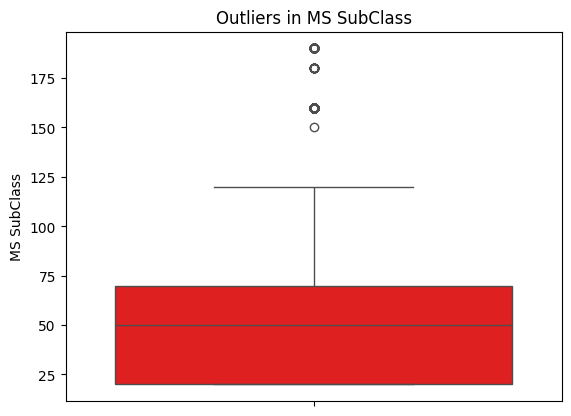

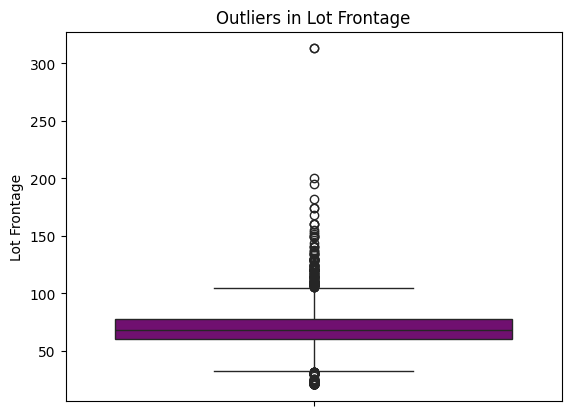

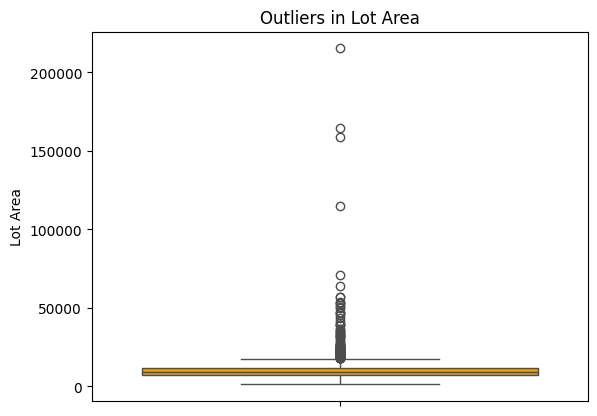

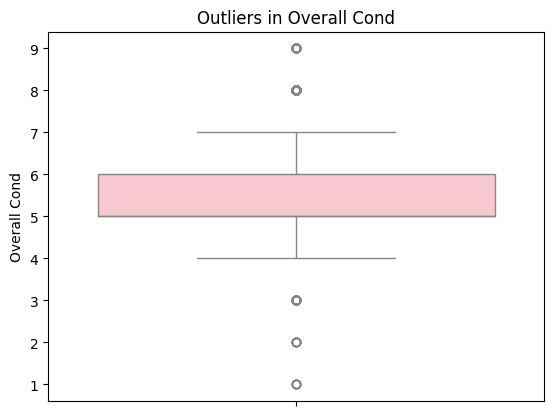

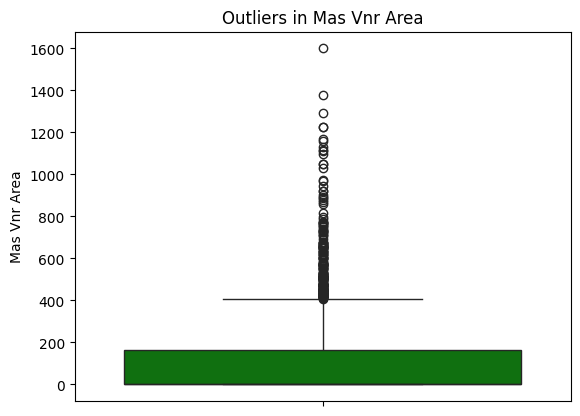

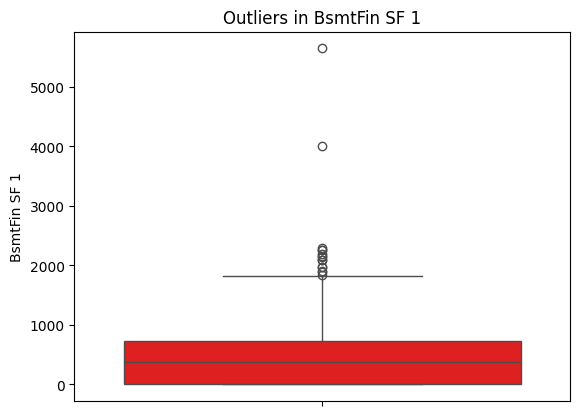

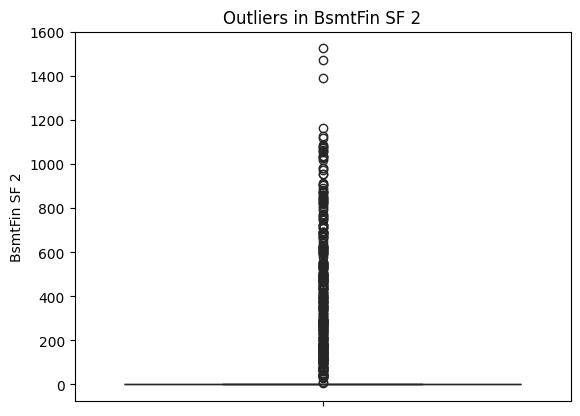

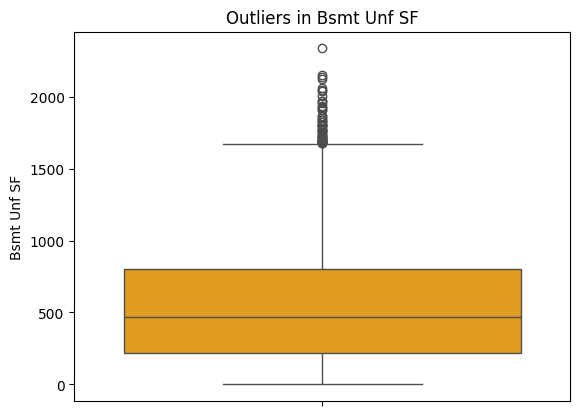

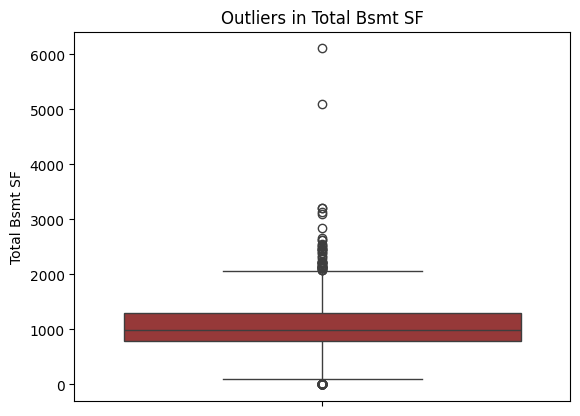

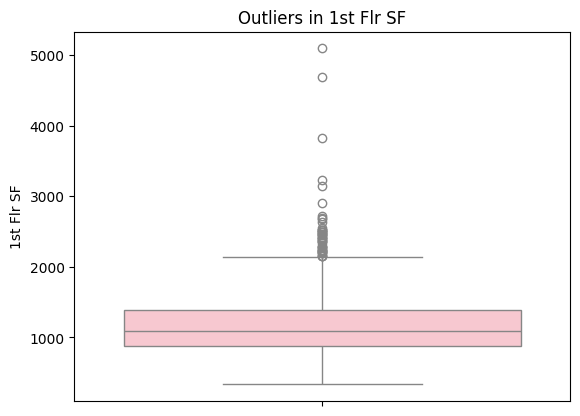

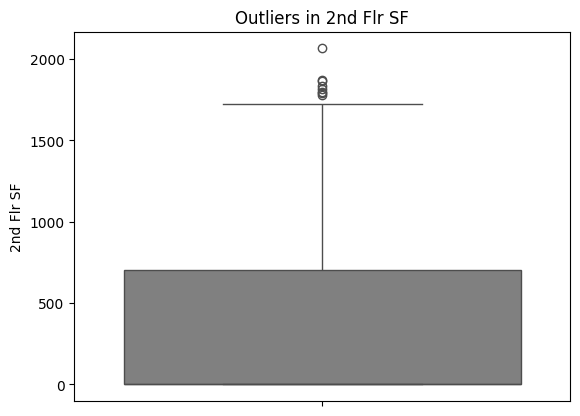

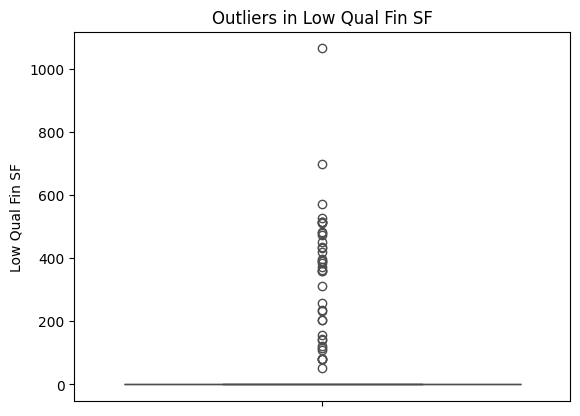

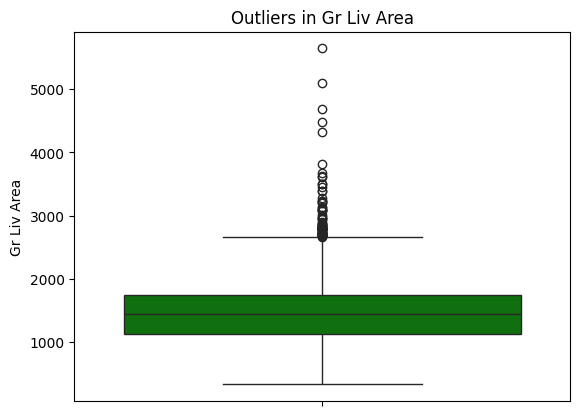

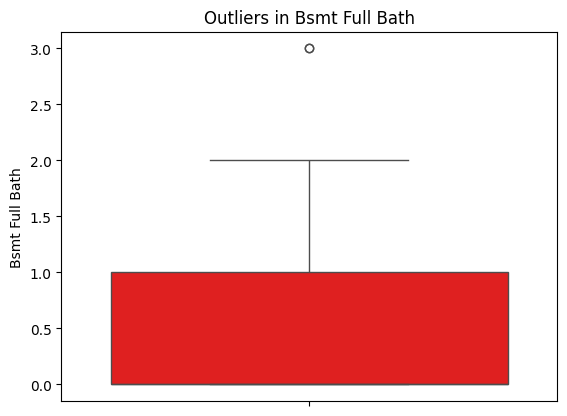

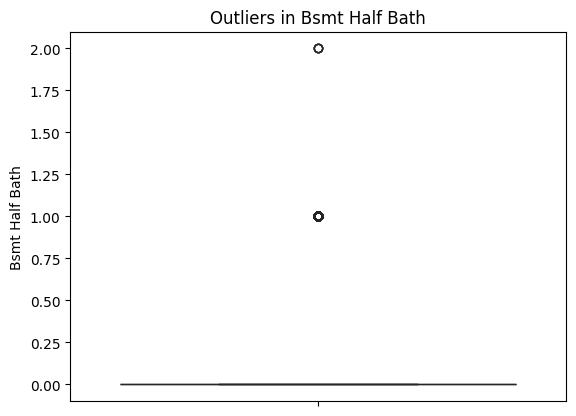

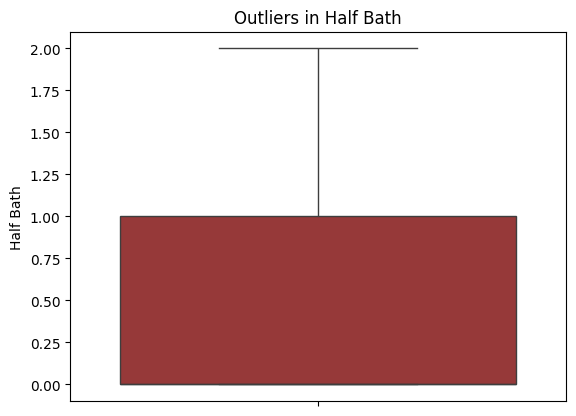

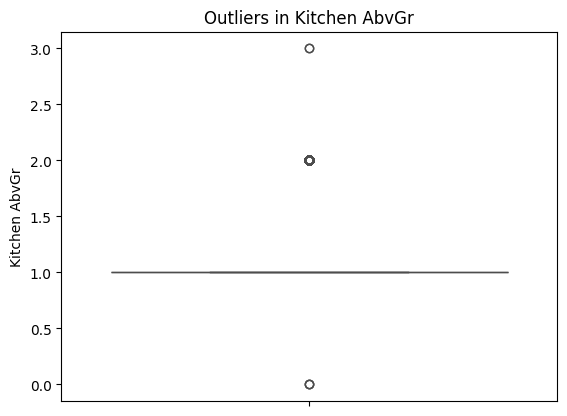

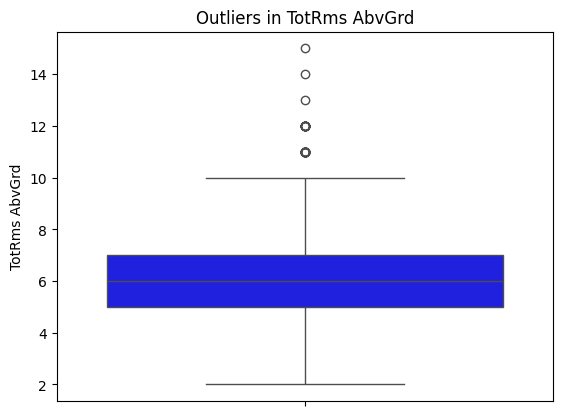

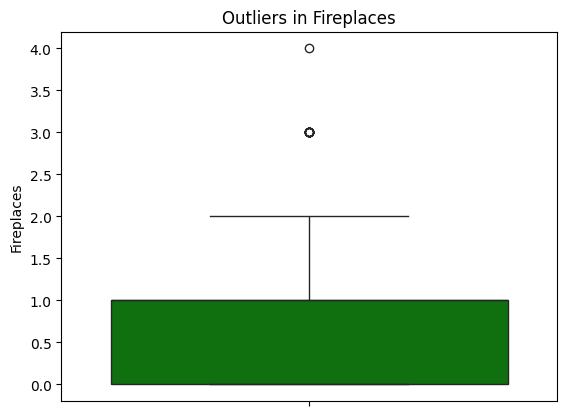

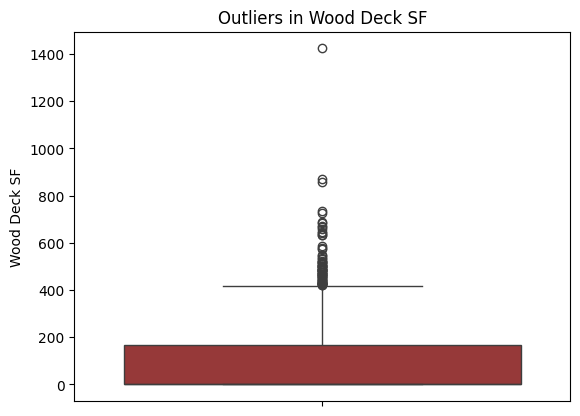

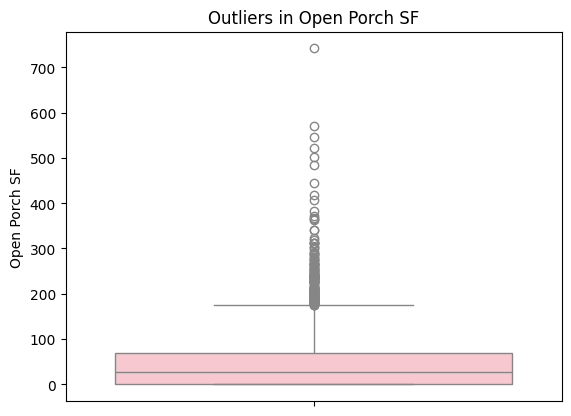

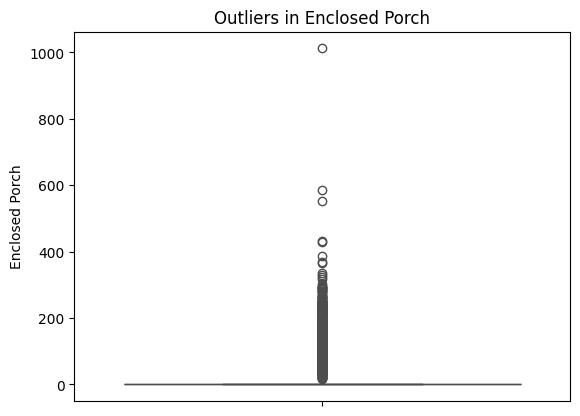

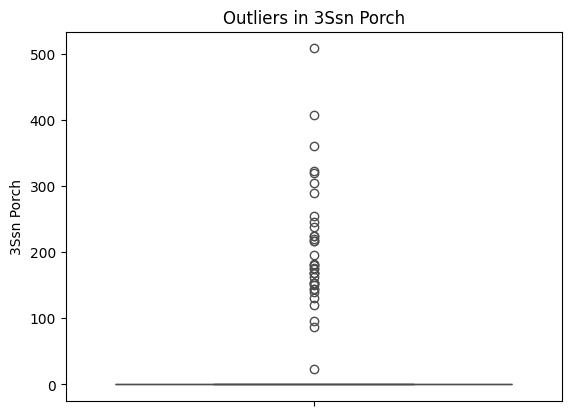

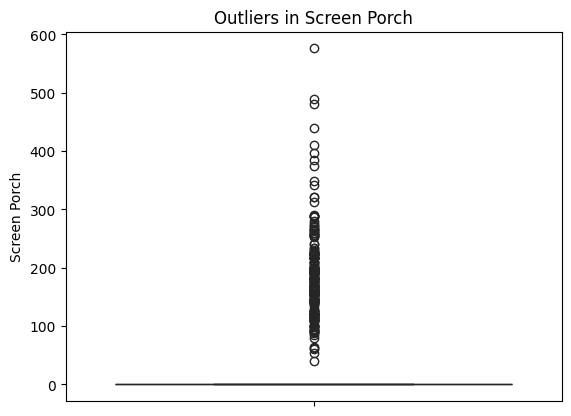

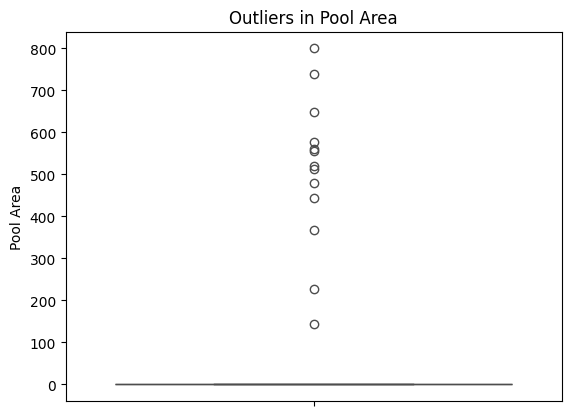

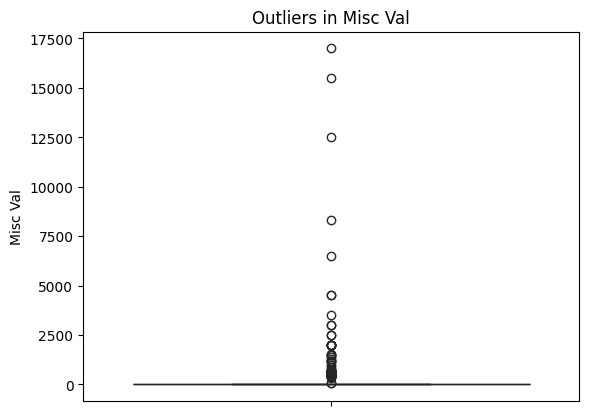

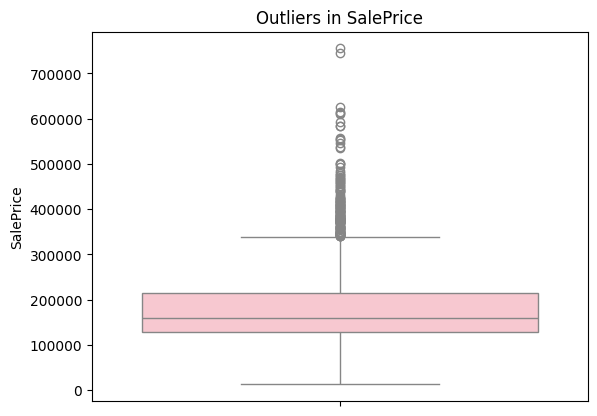

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# List of colors for the boxplots
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

# Iterate over original numerical columns from 'data'
for idx, i in enumerate(data.select_dtypes(include=['number']).columns):
    if data[i].skew() > 0.5:
        plt.figure()
        plt.title(f"Outliers in {i}")
        sns.boxplot(data[i], color=colors[idx % len(colors)])
        plt.show()

Some of the numerical data are skewed, So IQR method is applied over numerical data to remove the outliers

In [86]:
q1=data[numerical_data].quantile(0.25)
q3=data[numerical_data].quantile(0.75)
# Calculate the iqr for each column
IQR=q3-q1

# Filter out the outliers and handle outliers
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
data_cleaned= data[~((data[numerical_data] < (lower_bound)) |(data[numerical_data] > (upper_bound))).any(axis=1)]

# checking skewnes again
data_cleaned[numerical_data].skew()>0.5

,0
Order,False
PID,False
MS SubClass,True
Lot Frontage,False
Lot Area,False
Overall Qual,False
Overall Cond,True
Year Built,False
Year Remod/Add,False
Mas Vnr Area,True


In [87]:
data_cleaned1= data[~((data[numerical_data] < (q1 - 1 * IQR)) |(data[numerical_data] > ( q3 + 1 * IQR))).any(axis=1)]
# checking skewnes again
data_cleaned1[numerical_data].skew()>0.5




,0
Order,False
PID,False
MS SubClass,True
Lot Frontage,False
Lot Area,False
Overall Qual,False
Overall Cond,True
Year Built,False
Year Remod/Add,False
Mas Vnr Area,True


In [88]:
# Step 1: Identify numerical columns
numerical_columns = data_cleaned1.select_dtypes(include=['number']).columns

# Step 2: Identify columns with skewness > 0.5
high_skew_columns = [col for col in numerical_columns if data_cleaned1[col].skew() > 0.5]

In [89]:
# Step 3: Remove outliers using IQR for columns with high skewness
for col in high_skew_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = data_cleaned1[col].quantile(0.25)
    q3 = data_cleaned1[col].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Apply the bounds to filter out the outliers
    data_cleaned1 = data_cleaned1[
        (data_cleaned1[col] >= lower_bound) & (data_cleaned1[col] <= upper_bound)
    ]


In [90]:
# checking skewnes again
data_cleaned1[numerical_data].skew()>0.5


,0
Order,False
PID,False
MS SubClass,True
Lot Frontage,False
Lot Area,False
Overall Qual,False
Overall Cond,True
Year Built,False
Year Remod/Add,False
Mas Vnr Area,True


In [91]:
data_cleaned1[numerical_data].skew()>0.5

,0
Order,False
PID,False
MS SubClass,True
Lot Frontage,False
Lot Area,False
Overall Qual,False
Overall Cond,True
Year Built,False
Year Remod/Add,False
Mas Vnr Area,True


In [92]:
data_cleaned1[numerical_data].skew() > 0.5

,0
Order,False
PID,False
MS SubClass,True
Lot Frontage,False
Lot Area,False
Overall Qual,False
Overall Cond,True
Year Built,False
Year Remod/Add,False
Mas Vnr Area,True


In [93]:
from scipy.stats.mstats import winsorize

skewed_columns = data_cleaned1[numerical_data].skew()[data_cleaned1[numerical_data].skew() > 0.5].index

# Iterate over skewed columns
for col in skewed_columns:
    # Apply winsorize to each skewed column
    data_cleaned1[col] = winsorize(data_cleaned1[col], limits=[0.05, 0.05])

In [94]:
data_cleaned1[numerical_data].skew()

,0
Order,0.046480
PID,0.167399
MS SubClass,0.811445
Lot Frontage,0.067771
Lot Area,0.161638
Overall Qual,0.062014
Overall Cond,1.212193
Year Built,-0.625976
Year Remod/Add,-0.650895
Mas Vnr Area,1.363657


In [95]:
from scipy.stats import boxcox

skewed_columns1 = data_cleaned1[numerical_data].skew()[data_cleaned1[numerical_data].skew() > 0.5].index

# Iterate over skewed columns
for col in skewed_columns1:
   # Apply a shift to make the data positive before applying boxcox
    data_cleaned1[col], _= boxcox(data_cleaned1[col] + 1 - data_cleaned1[col].min())

In [96]:
nu_data = data.select_dtypes(include=['number']).columns
data_cleaned1[nu_data].skew()>0.5

,0
Order,False
PID,False
MS SubClass,False
Lot Frontage,False
Lot Area,False
Overall Qual,False
Overall Cond,True
Year Built,False
Year Remod/Add,False
Mas Vnr Area,True


In [97]:
data_cleaned1[nu_data]

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
4,5.0,527105010.0,5.287001,74.0,13830.0,5.0,0.000000,1997.0,1998.0,0.000000,...,4.965080,4.385756,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,189900.0
9,10.0,527162130.0,5.287001,60.0,7500.0,7.0,0.000000,1999.0,1999.0,0.000000,...,4.609860,5.246592,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,189000.0
10,11.0,527163010.0,5.287001,75.0,10000.0,6.0,0.000000,1993.0,1994.0,0.000000,...,4.708305,5.787376,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,175900.0
12,13.0,527166040.0,5.287001,63.0,8402.0,6.0,0.000000,1998.0,1998.0,0.000000,...,0.000000,5.602659,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,180400.0
13,14.0,527180040.0,0.000000,85.0,10176.0,7.0,0.000000,1990.0,1990.0,0.000000,...,4.880563,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,171500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,2873.0,910200020.0,2.999530,50.0,7288.0,5.0,0.323064,1942.0,1950.0,0.000000,...,4.724541,0.000000,0.0,0.0,0.0,0.0,0.0,8.0,2006.0,102000.0
2876,2877.0,910207110.0,2.999530,50.0,8765.0,4.0,0.323064,1936.0,1950.0,0.000000,...,0.000000,4.106510,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,106500.0
2888,2889.0,914476050.0,6.414218,78.0,10530.0,6.0,0.000000,1977.0,1977.0,1.766841,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.0,2006.0,135000.0
2911,2912.0,923225510.0,0.000000,58.0,10172.0,5.0,0.365244,1968.0,2003.0,0.000000,...,0.000000,6.298244,0.0,0.0,0.0,0.0,0.0,10.0,2006.0,126500.0


In [98]:
data_cleaned1['Mas Vnr Area'].skew()

0.7889835243145321

In [99]:
# Optionally: Remove outliers
q1a = data_cleaned1['Mas Vnr Area'].quantile(0.25)
q3a = data_cleaned1['Mas Vnr Area'].quantile(0.75)
iqra = q3a - q1a
lower_bounda = q1a - 1 * iqra
upper_bounda = q3a + 1 * iqra
data_cleaned1 = data_cleaned1[(data_cleaned1['Mas Vnr Area'] >= lower_bounda) & (data_cleaned1['Mas Vnr Area'] <= upper_bounda)]


In [100]:
import numpy as np # imports numpy module as np
from scipy import stats # imports stats module from scipy package
# Apply Box-Cox Transformation
data_cleaned1['BoxCox Mas Vnr Area'], lambda_ = stats.boxcox(data_cleaned1['Mas Vnr Area'] + 1)  # Add 1 to handle zero values

In [101]:
data_cleaned1['BoxCox Mas Vnr Area'].skew()

0.7784788227484384

In [102]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson Transformation

pt = PowerTransformer(method='yeo-johnson')
data_cleaned1['YeoJohnson Mas Vnr Area'] = pt.fit_transform(data_cleaned1[['Mas Vnr Area']]) # Apply the transformation to data_cleaned1 instead of data

In [103]:
data_cleaned1['Mas Vnr Area'].skew()

0.7889835243145321

In [104]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_cleaned1['Robust Scaled Mas Vnr Area'] = scaler.fit_transform(data_cleaned1[['Mas Vnr Area']]) # Use double brackets to create a 2D array

In [105]:
data_cleaned1['Mas Vnr Area'].skew()

0.7889835243145321

In [106]:
data_cleaned1['Robust Scaled Mas Vnr Area'].skew()

0.7889835243145319

In [107]:
data_cleaned1['Mas Vnr Area'] = data_cleaned1['Robust Scaled Mas Vnr Area']

In [108]:
nu  = data_cleaned1.select_dtypes(include=['number'])

In [109]:
nu.skew()>0.5

,0
Order,False
PID,False
MS SubClass,False
Lot Frontage,False
Lot Area,False
Overall Qual,False
Overall Cond,True
Year Built,False
Year Remod/Add,False
Mas Vnr Area,True


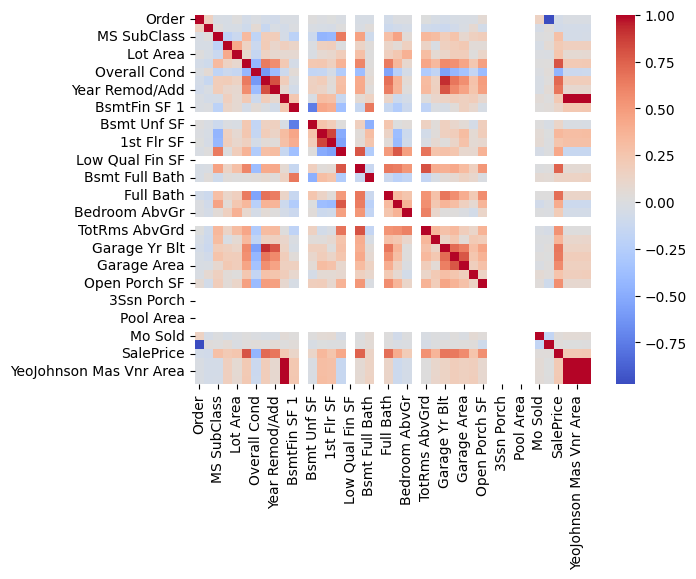

In [112]:
corr_matrix = nu.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

In [114]:
categorical_features = data_cleaned1.select_dtypes(include=['object'])
categorical_features.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [115]:
for i in categorical_features.columns:
  print(i)
  print(data_cleaned1[i].value_counts())

MS Zoning
MS Zoning
RL    617
RM     59
FV     33
RH      2
Name: count, dtype: int64
Street
Street
Pave    711
Name: count, dtype: int64
Alley
Alley
Grvl    705
Pave      6
Name: count, dtype: int64
Lot Shape
Lot Shape
Reg    440
IR1    261
IR2     10
Name: count, dtype: int64
Land Contour
Land Contour
Lvl    674
Bnk     18
HLS     15
Low      4
Name: count, dtype: int64
Utilities
Utilities
AllPub    711
Name: count, dtype: int64
Lot Config
Lot Config
Inside     551
Corner     106
CulDSac     35
FR2         16
FR3          3
Name: count, dtype: int64
Land Slope
Land Slope
Gtl    694
Mod     17
Name: count, dtype: int64
Neighborhood
Neighborhood
CollgCr    136
NAmes      115
Gilbert    108
Edwards     45
Sawyer      42
Somerst     42
SawyerW     41
NWAmes      27
OldTown     26
BrkSide     26
Mitchel     26
Timber      19
NridgHt     12
Crawfor      9
IDOTRR       8
Blmngtn      8
SWISU        6
NoRidge      4
StoneBr      3
Veenker      2
ClearCr      2
MeadowV      2
Greens       1
N

# LABEL ENCODING

In [122]:
# Select categorical features
categorical_features = data_cleaned1.select_dtypes(include=['object'])

# Initialize LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical feature
for column in categorical_features.columns:
    le = LabelEncoder()
    data_cleaned1[column] = le.fit_transform(data_cleaned1[column])
    label_encoders[column] = le  # Store the encoder for possible inverse transformation later

# Check the transformed columns
print(data_cleaned1.head())

    Order          PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  \
4     5.0  527105010.0     5.287001          2          74.0   13830.0   
9    10.0  527162130.0     5.287001          2          60.0    7500.0   
10   11.0  527163010.0     5.287001          2          75.0   10000.0   
12   13.0  527166040.0     5.287001          2          63.0    8402.0   
13   14.0  527180040.0     0.000000          2          85.0   10176.0   

    Street  Alley  Lot Shape  Land Contour  ...  Misc Feature  Misc Val  \
4        0      0          0             3  ...             0       0.0   
9        0      0          2             3  ...             0       0.0   
10       0      0          0             3  ...             0       0.0   
12       0      0          0             3  ...             0       0.0   
13       0      0          2             3  ...             0       0.0   

    Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  \
4       3.0   2010.0          8           

# Feature selection

In [124]:
data_cleaned1.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [147]:
# Defined feature (x), and target (y)

# Assuming 'X' and 'y' are your features and target
X = data_cleaned1.drop('SalePrice', axis=1)
y = data_cleaned1['SalePrice']
# Check the shapes
print(X.shape)  # Should be (number of samples, number of features)
print(y.shape)  # Should be (number of samples,)

(711, 84)
(711,)


# STANDARDIZATION

In [148]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data_x = scaler.fit_transform(X)

# Model building machine learning

In [152]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(scaled_data_x, y, test_size=0.2, random_state=42)

In [153]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((568, 84), (568,), (143, 84), (143,))

In [158]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [155]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}


In [159]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate metrics
    results[name] = {
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R-squared': r2_score(y_test, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                              MSE          RMSE           MAE  R-squared
Linear Regression    1.914881e+08  13837.922568  10198.407258   0.891878
Random Forest        2.481128e+08  15751.597761  11614.472098   0.859906
Gradient Boosting    1.963014e+08  14010.760843  10261.399030   0.889161
SVM                  7.832865e+08  27987.255688  21276.146853   0.557726
K-Nearest Neighbors  1.068913e+09  32694.227596  23836.013986   0.396450
Decision Tree        9.513792e+08  30844.436264  22341.755245   0.462814
Logistic Regression  6.169459e+08  24838.394844  17991.811189   0.651648


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear Regression is the best model among those tested based on the provided metrics.
Other models like Random Forest, Gradient Boosting, and Decision Tree have higher error metrics and lower R² values.
Models like SVM and K-Nearest Neighbors have the poorest performance in this case.